# Lines and asemic writing

By [Allison Parrish](http://www.decontextualize.com/)

This notebook builds on (and repeats) some of the examples from the initial [Flat tutorial](flat-asemic-writing.ipynb) notebook. The goal here is to work from the concept of the *line* up to algorithms that produce asemic writing.

Here are the libraries and functions we'll use:

In [1]:
import bezmerizing

In [2]:
import random

In [3]:
from flat import document, shape, rgb, rgba

In [4]:
from numpy.random import uniform, normal, choice

In [5]:
from scipy.stats import truncnorm
def t_normal(a, b, mu, sigma):
    tn = truncnorm((a-mu)/sigma, (b-mu)/sigma, loc=mu, scale=sigma)
    return tn.rvs(1)[0]

In [6]:
import numpy as np

In [7]:
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))

## The line

A line segment connects two points. The easiest way to specify a line segment is with two points: where the line starts, and where the line ends. You can draw one using [Flat](https://xxyxyz.org/flat) like this:

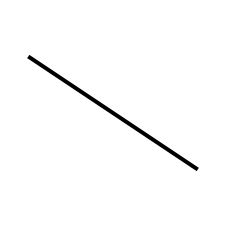

In [8]:
d = document(80, 80, 'mm')
page = d.addpage()
brush = shape().stroke(rgb(0, 0, 0)).width(4)
line_obj = brush.line(10, 20, 70, 60)
page.place(line_obj)
show(page)

The `.line()` method of the `brush` variable (a Flat `shape` object) takes four parameters: the `x, y` coordinates of the line's beginning and the `x, y` coordinates of the line's end. The following cell draws multiple lines:

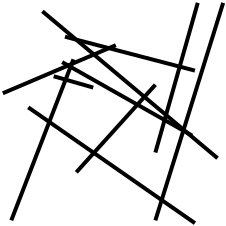

In [9]:
d = document(80, 80, 'mm')
page = d.addpage()
brush = shape().stroke(rgb(0, 0, 0)).width(4)
for i in range(10):
    x1 = random.randrange(80)
    y1 = random.randrange(80)
    x2 = random.randrange(80)
    y2 = random.randrange(80)
    line_obj = brush.line(x1, y1, x2, y2)
    page.place(line_obj)
show(page)

## The polyline

A first approximation of the structure of written characters is that they consist of sequences of line segments, each starting at the end of the last. The term in computer graphics for such a sequence of connected lines is a `polyline`. The `bezmerizing` library has a convenient class for representing polylines called `Polyline`:

In [10]:
from bezmerizing import Polyline

To create a `Polyline` object, pass in a list of 2d points (a list of lists):

In [11]:
pline = Polyline([[40, 10], [10, 40], [20, 60], [70, 70]])

To draw the polyline, pass it to Flat's `.polyline()` method, like so:

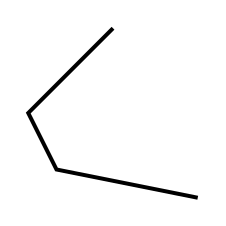

In [12]:
d = document(80, 80, 'mm')
page = d.addpage()
brush = shape().stroke(rgb(0, 0, 0)).width(4)
pline_obj = brush.polyline(pline)
page.place(pline_obj)
show(page)

A `Polyline` object also represents a polygon; the only difference between a polyline and a polygon is that when you draw a polygon, you connect the last point to the first point. To draw a `Polyline` object like this, use Flat's `.polygon()` method:

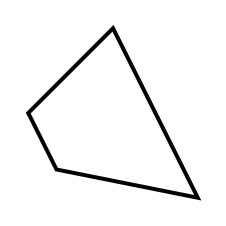

In [13]:
d = document(80, 80, 'mm')
page = d.addpage()
brush = shape().stroke(rgb(0, 0, 0)).width(4)
pline_obj = brush.polygon(pline)
page.place(pline_obj)
show(page)

You can think of a single line segment as just a special kind of polyline that only has two points. You can also represent this with a `Polyline` object:

In [14]:
line_seg = Polyline([[10, 10], [70, 70]])

You can pass this `Polyline` object to the `.polyline()` method of a Flat `shape` just like any other `Polyline`:

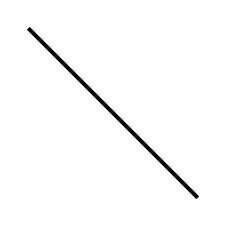

In [15]:
d = document(80, 80, 'mm')
page = d.addpage()
brush = shape().stroke(rgb(0, 0, 0)).width(4)
pline_obj = brush.polyline(line_seg)
page.place(pline_obj)
show(page)

### Transforming polylines

A polyline is a sequence of 2d coordinates. As such, you can modify polylines with [affine transformations](https://en.wikipedia.org/wiki/Affine_transformation) like translation, rotation, scaling, etc. (If you're familiar with p5js and need a refresher on affine transformations, [here's a tutorial you can follow](https://creative-coding.decontextualize.com/transformations-and-functions/)).

The `Polyline` object has `.translate()`, `.rotate()` and `.scale()` methods that perform the corresponding transformation to the object's coordinates and return a new `Polyline` with the transformed coordinates. (The original `Polyline`'s coordinates are left unchanged.) In the following cells, I draw the polyline we created above, along with a copy of the polyline with various translations performed.

#### Translation

First, the `.translate()` method moves the polyline by the `x, y` offset specified as parameters:

In [16]:
print(pline)
print(pline.translate(15, -5))

Polyline([[40.0000, 10.0000], [10.0000, 40.0000], [20.0000, 60.0000], [70.0000, 70.0000]])
Polyline([[55.0000, 5.0000], [25.0000, 35.0000], [35.0000, 55.0000], [85.0000, 65.0000]])


Here's the original polyline plus its translation. (I used two separate `shape()`s so you can see the original and the modified version.)

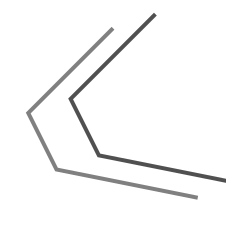

In [17]:
d = document(80, 80, 'mm')
page = d.addpage()
orig_brush = shape().stroke(rgb(128, 128, 128)).width(4)
tr_brush = shape().stroke(rgb(80, 80, 80)).width(4)
page.place(orig_brush.polyline(pline))
# draw the same polyline, up and to the right
page.place(tr_brush.polyline(pline.translate(15, -5)))
show(page)

#### Rotation

The `.rotate()` method rotates the coordinates in the polyline around `(0, 0)`, using the specified angle in [radians](https://en.wikipedia.org/wiki/Radian):

In [18]:
print(pline)
print(pline.rotate(-1))

Polyline([[40.0000, 10.0000], [10.0000, 40.0000], [20.0000, 60.0000], [70.0000, 70.0000]])
Polyline([[13.1974, 39.0619], [-28.2558, 30.0268], [-39.6822, 49.2476], [-21.0818, 96.7241]])


The following cell shows the original polyline and its rotation:

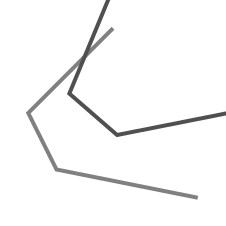

In [19]:
d = document(80, 80, 'mm')
page = d.addpage()
orig_brush = shape().stroke(rgb(128, 128, 128)).width(4)
tr_brush = shape().stroke(rgb(80, 80, 80)).width(4)
page.place(orig_brush.polyline(pline))
# draw the same polyline, rotated counterclockwise one 16th of a turn
page.place(tr_brush.polyline(pline.rotate(np.pi*0.125)))
show(page)

If you want to use degrees instead of radians, use the `np.radians()` function (making sure to `import numpy as np` in your notebook as I did at the top of this one). This function returns the equivalent amount of radians for the specified degrees you specify:

In [20]:
np.radians(90)

1.5707963267948966

But what if you want to rotate around some point other than `(0, 0)`? One way is to simply generate your polyline such that its center is at `(0, 0)` instead of some other point—we'll be using this strategy further down in the notebook. Another method is to first translate the polyline roughly so its center point will be at `(0, 0)`, then rotate it, then translate it back to where you want it to be drawn on the canvas. The following example shows the second technique, translating the polyline, then drawing rotated versions of it several times:

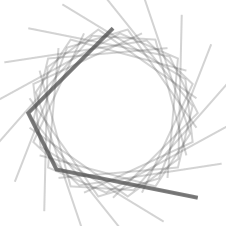

In [21]:
d = document(80, 80, 'mm')
page = d.addpage()
orig_brush = shape().stroke(rgb(128, 128, 128)).width(4)
tr_brush = shape().stroke(rgba(80, 80, 80, 64)).width(2)
page.place(orig_brush.polyline(pline))

# the center of pline is roughly at (40, 40), so translate that distance
# up and to the left
centered_pline = pline.translate(-40, -40)
for theta in range(0, 360, 20):
    rotated = centered_pline.rotate(np.radians(theta))
    translated = rotated.translate(40, 40)
    page.place(tr_brush.polyline(translated))
    
show(page)

#### Scale

The `.scale()` method scales the polyline by the specified factor:

In [22]:
print(pline)
print(pline.scale(2))

Polyline([[40.0000, 10.0000], [10.0000, 40.0000], [20.0000, 60.0000], [70.0000, 70.0000]])
Polyline([[80.0000, 20.0000], [20.0000, 80.0000], [40.0000, 120.0000], [140.0000, 140.0000]])


The following cell shows this same polyline alongside a copy that has been scaled to three-quarters size:

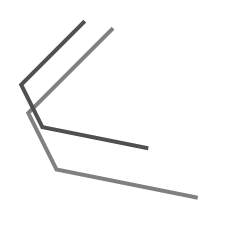

In [23]:
d = document(80, 80, 'mm')
page = d.addpage()
orig_brush = shape().stroke(rgb(128, 128, 128)).width(4)
tr_brush = shape().stroke(rgb(80, 80, 80)).width(4)
page.place(orig_brush.polyline(pline))
# draw the same polyline, scaled to 0.75 size
page.place(tr_brush.polyline(pline.scale(0.75)))
show(page)

The `.scalexy()` method makes it easy to give different scales for the `x` and `y` dimensions of the polyline:

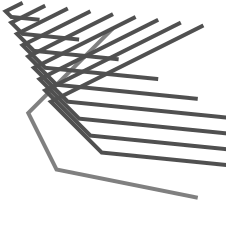

In [24]:
d = document(80, 80, 'mm')
page = d.addpage()
orig_brush = shape().stroke(rgb(128, 128, 128)).width(4)
tr_brush = shape().stroke(rgb(80, 80, 80)).width(4)
page.place(orig_brush.polyline(pline))
# draw the same polyline, scaled to 0.75 size
for i in range(10):
    page.place(tr_brush.polyline(pline.scalexy(i*0.2, i*0.1)))
show(page)

#### Arbitrary modifications

You can access the Polyline's underlying numpy array with the `.vertices` attribute, and perform whatever operations you want on that directly. The following example generates a random `Polyline` and draws it to the canvas multiple times, progressively adding noise:

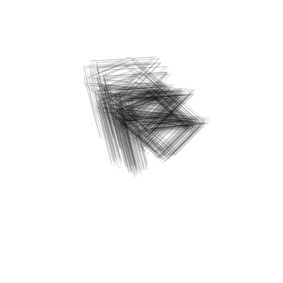

In [191]:
# generate polyline
pts = []
for i in range(12):
    pts.append([normal(), normal()])
pline = Polyline(pts)

# draw polyline many times on top of itself
d = document(100, 100, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 24)).width(1)
for i in range(100):
    # add a bit of noise to the coordinates on each loop
    pline.vertices += np.random.randn(2) * 0.1
    lines = figure.polyline(pline.scale(10).translate(50, 50))
    page.place(lines)
show(page)

### Generating random polylines

In this notebook, we're concerned with generating asemic writing. To do this, we need to generate figures that resemble written characters. We'll accomplish this by generating polylines at random.

A polyline is simply a sequence of points, which we can generate in a `for` loop. The following cell creates a polyline from ten points whose x- and y- coordinates are drawn from a uniform distribution between -0.5 and 0.5:

In [25]:
pts = []
for i in range(10):
    pts.append([uniform(-0.5, 0.5), uniform(-0.5, 0.5)])
rand_pline = Polyline(pts)

You can see the values in a `Polyline` object by evaluating it in its own cell:

In [26]:
rand_pline

Polyline([[-0.3434, -0.4894], [0.4805, 0.1633], [0.0282, -0.0047], [-0.3608, -0.4354], [-0.3111, 0.1506], [0.4091, 0.4569], [0.2295, -0.3673], [0.1866, 0.1780], [0.4719, 0.4520], [0.0694, -0.4308]])

This polyline will be too small for us to see in detail if we were to draw it directly, both because all of the points are less than one, and because three-quarters of the points (on average) will be off-canvas. We'll use the `Polyline` object's `.scale()` and `.translate()` methods first to scale the polyline up to a visible size and then to move its center point to somewhere on canvas where the entire polyline will be visible.

In [27]:
rand_pline.translate(0.5, 0.5).scale(80)

Polyline([[12.5313, 0.8460], [78.4404, 53.0636], [42.2546, 39.6215], [11.1388, 5.1651], [15.1112, 52.0448], [72.7287, 76.5489], [58.3575, 10.6138], [54.9243, 54.2363], [77.7541, 76.1581], [45.5494, 5.5381]])

Here's what it looks like:

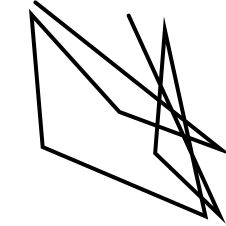

In [288]:
d = document(80, 80, 'mm')
page = d.addpage()
brush = shape().stroke(rgb(0, 0, 0)).width(4).join('round')
page.place(brush.polyline(rand_pline.translate(0.5, 0.5).scale(80)))
show(page)

> "Wait," you say. "If we're just going to translate it and scale it up anyway, why not just use a bigger upper limit on the random numbers when you generate the points?" Good question! Whenever I'm writing code that generates stuff, I prefer to write it such that the figures it produces are "unit scale," i.e., are sized so that the figures are 1 unit across. The reason for this is that it lets me separate the logic of the generator from the logic of how the generated data gets displayed. If I work at unit scale and use the `.scale()` method, I can use the same generator to create small characters and large characters, without having to modify the underlying generator code. That's a handy bit of flexibility. Generating the figures with their center point at `(0, 0)` is a more aesthetic decision; in this case, it lets us rotate the figures around their centers easily.

#### A function for generating random polylines

The following cell defines a [Python function](https://docs.python.org/3/tutorial/controlflow.html#defining-functions) that returns a randomly generated polyline using the technique discussed above. The function takes a single parameter, which you can use to specify the number of segments to be added at random to the polyline.

In [29]:
def uniform_glyph(n=10):
    pts = []
    for i in range(n):
        pts.append([uniform(-0.5, 0.5), uniform(-0.5, 0.5)])
    rand_pline = Polyline(pts)
    return rand_pline

The following cell uses this function to generate a large number of glyphs, and draws them to the canvas at random places with random sizes:

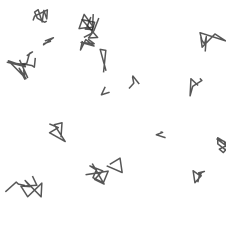

In [30]:
d = document(80, 80, 'mm')
page = d.addpage()
brush = shape().nofill().stroke(rgba(40, 40, 40, 200)).width(1.5).join('round')
for i in range(20):
    glyph = uniform_glyph(random.randrange(4, 12))
    glyph = glyph.scale(uniform(5, 10)).translate(uniform(80), uniform(80))
    page.place(brush.polyline(glyph))
show(page)

Nice! This still doesn't quite look like writing, but I think we're on the right path. Play around with the various numbers (e.g., the parameter passed to `uniform_glyph()`) to get a handle on how this works.

#### Giving a bit of structure to glyphs

The following function is a variation on `uniform_glyph()` above that starts each glyph with a single line at its baseline, in order to lend the glyphs it produces some kind of shared structure and repetition. This is an easy way to make the glyphs look less like random lines and more like "writing":

In [31]:
def uniform_glyph_baseline(n=10):
    pts = [[-0.4, 0.5], [0.4, 0.5]]
    for i in range(n):
        pts.append([uniform(-0.5, 0.5), uniform(-0.5, 0.5)])
    rand_pline = Polyline(pts)
    return rand_pline

Here's the same code as above, using the `uniform_glyph_baseline()` function instead:

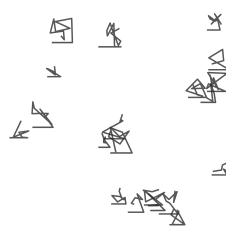

In [32]:
d = document(80, 80, 'mm')
page = d.addpage()
brush = shape().nofill().stroke(rgba(40, 40, 40, 200)).width(1.5).join('round')
for i in range(20):
    glyph = uniform_glyph_baseline(random.randrange(4, 12))
    glyph = glyph.scale(uniform(5, 10)).translate(uniform(80), uniform(80))
    page.place(brush.polyline(glyph))
show(page)

## What we've got so far

The previous example follows the general overall structure we'll be using for the remainder of our asemic writing experiments. That structure is:

* Devise a strategy for producing a single glyph at unit scale. (In the case of the previous example, the glyph is a polyline of points drawn from a uniform distribution.)
* Write a function to implement the glyph-generating strategy.
* Write some code to "lay out" the glyphs on the page. (In the case of the previous example, the "layout" code is simply drawing the glyphs one by one on the canvas at random positions.)

If we want to refine our results, we can refine (a) the strategy for producing glyphs and/or (b) the strategy for laying out the glyphs on the page. Let's start with some layout strategies.

## Glyph layout

Laying characters from real languages out on a page is a tremendously complicated task! Fortunately, if we're generating the glyphs ourselves, we can make certain assumptions that make the process easier.

### Glyphs on a grid

Aside from placing glyphs on the page at random positions, the simplest way of creating a glyph layout is to place the glyphs on a grid. To do this, you can use a `for` loop to produce `x, y` coordinates for each position on the grid, then generate a glyph and translate it to that position. The following example produces a 10x10 grid of glyphs on the page using nested `for` loops:

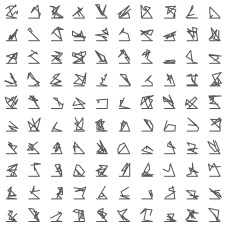

In [33]:
width = 80
height = 80
d = document(width, height, 'mm')
page = d.addpage()
brush = shape().nofill().stroke(rgba(40, 40, 40, 200)).width(1).join('round')
grid_size = 10
# size of a single rectangle in the grid
cell_size_x = width / grid_size
cell_size_y = height / grid_size
for i in range(grid_size):
    for j in range(grid_size):
        scale_val = (width / grid_size) * 0.6
        x = i * cell_size_x + (cell_size_x * 0.5) # add 1/2 cell size to offset glyph center
        y = j * cell_size_y + (cell_size_y * 0.5)
        glyph = uniform_glyph_baseline(random.randrange(4, 12))
        glyph = glyph.scale(scale_val).translate(x, y)
        page.place(brush.polyline(glyph))
show(page)

#### Variation 1: Staggered grids

Grids are a very easy way to lay out glyphs. To my eye, though, a grid also strongly suggests east Asian forms of writing (Hanzi, Kanji, Hangul, etc.), which can lend an unwanted air of orientalism to an asemic work. One way to break this up is to stagger the grid a little bit. The following example is identical to the above, except it adds an offset to each row based on whether the row has an even or odd number:

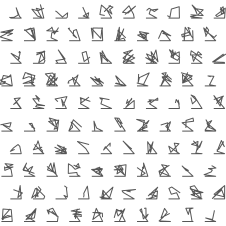

In [34]:
width = 80
height = 80
d = document(width, height, 'mm')
page = d.addpage()
brush = shape().nofill().stroke(rgba(40, 40, 40, 200)).width(1).join('round')
grid_size = 10
# size of a single rectangle in the grid
cell_size_x = width / grid_size
cell_size_y = height / grid_size
for i in range(grid_size):
    for j in range(grid_size):
        scale_val = (width / grid_size) * 0.6
        x = i * cell_size_x + (cell_size_x * 0.5) # add 1/2 cell size to offset glyph center
        y = j * cell_size_y + (cell_size_y * 0.5)
        if j % 2 == 0:
            x += scale_val * 0.33
        else:
            x -= scale_val * 0.33
        glyph = uniform_glyph_baseline(random.randrange(4, 12))
        glyph = glyph.scale(scale_val).translate(x, y)
        page.place(brush.polyline(glyph))
show(page)

#### Variation 2: Adding spaces

There are a number of ways we can add variation to the grid to make it seem more natural. One is to leave spaces between the items in the grid, in order to give the appearance of separate words. The easiest way to do this is to optionally leave a grid space empty if a random number doesn't meet a particular threshold:

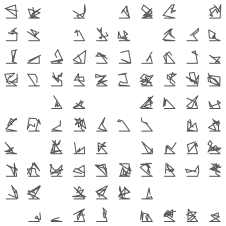

In [35]:
width = 80
height = 80
d = document(width, height, 'mm')
page = d.addpage()
brush = shape().nofill().stroke(rgba(40, 40, 40, 200)).width(1).join('round')
grid_size = 10
# size of a single rectangle in the grid
cell_size_x = width / grid_size
cell_size_y = height / grid_size
for i in range(grid_size):
    for j in range(grid_size):
        if uniform() < 0.85:
            scale_val = (width / grid_size) * 0.6
            x = i * cell_size_x + (cell_size_x * 0.5) # add 1/2 cell size to offset glyph center
            y = j * cell_size_y + (cell_size_y * 0.5)
            glyph = uniform_glyph_baseline(random.randrange(4, 12))
            glyph = glyph.scale(scale_val).translate(x, y)
            page.place(brush.polyline(glyph))
show(page)

Another option is to add a ragged bottom margin by looping only up to a random number of times on the `x` axis:

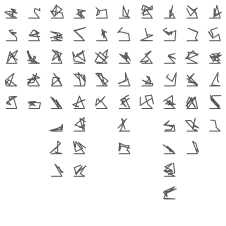

In [36]:
width = 80
height = 80
d = document(width, height, 'mm')
page = d.addpage()
brush = shape().nofill().stroke(rgba(40, 40, 40, 200)).width(1).join('round')
grid_size = 10
# size of a single rectangle in the grid
cell_size_x = width / grid_size
cell_size_y = height / grid_size
for i in range(grid_size):
    for j in range(random.randrange(4, grid_size)):
        scale_val = (width / grid_size) * 0.6
        x = i * cell_size_x + (cell_size_x * 0.5) # add 1/2 cell size to offset glyph center
        y = j * cell_size_y + (cell_size_y * 0.5)
        glyph = uniform_glyph_baseline(random.randrange(4, 12))
        glyph = glyph.scale(scale_val).translate(x, y)
        page.place(brush.polyline(glyph))
show(page)

You can make this a ragged right margin by swapping the `i` and `j` loop variables:

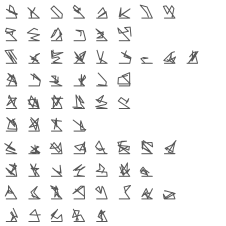

In [37]:
width = 80
height = 80
d = document(width, height, 'mm')
page = d.addpage()
brush = shape().nofill().stroke(rgba(40, 40, 40, 200)).width(1).join('round')
grid_size = 10
# size of a single rectangle in the grid
cell_size_x = width / grid_size
cell_size_y = height / grid_size
for j in range(grid_size):
    for i in range(random.randrange(4, grid_size)):
        scale_val = (width / grid_size) * 0.6
        x = i * cell_size_x + (cell_size_x * 0.5) # add 1/2 cell size to offset glyph center
        y = j * cell_size_y + (cell_size_y * 0.5)
        glyph = uniform_glyph_baseline(random.randrange(4, 12))
        glyph = glyph.scale(scale_val).translate(x, y)
        page.place(brush.polyline(glyph))
show(page)

### "Typesetting" glyphs with variable widths

Another way to lay out glyphs is one by one, in rows, like typesetting text in Roman alphabets. This technique is especially useful when you're working with glyphs that don't have a uniform width. The algorithm for performing this makes use of two variables, `current_x` and `current_y`, which essentially act as the position of the "cursor." Before drawing a glyph to the canvas, the algorithm checks to see if `current_x` plus glyph's width would be greater than the width of the canvas. If so, the algorithm resets `current_x` to zero and increments `current_y` by the height of the line, causing the glyph (and subsequent glyphs) to be drawn on the next line.

The `uniform_glyph_baselines()` function defined above produce glyphs of uniform width (on average, at least), so to simulate glyphs with different lengths, we'll *scale* those glyphs by random values. The code in the following cell creates a list of glyph widths, one value for every glyph we want to draw, randomly drawn from a closed set:

In [38]:
glyph_count = 200
glyph_widths = [random.choice([0.25, 0.5, 1]) for i in range(glyph_count)]

Here are the first few values from the list, just so you get an idea what they look like:

In [39]:
glyph_widths[:12]

[1, 0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.25, 0.25, 0.5, 0.25, 1]

The following code performs the "typesetting." I've left comments in the code to explain how everything works.

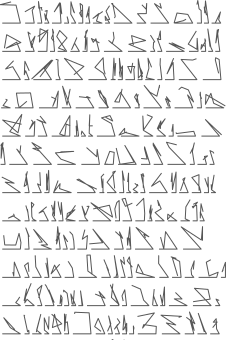

In [40]:
width = 80
height = 120
d = document(width, height, 'mm')
page = d.addpage()
brush = shape().nofill().stroke(rgba(40, 40, 40, 200)).width(1).join('round')

# cursor values
current_x = 0
current_y = 0

em_width = 8 # width of glyph
em_height = 8 # height of glyph 
line_height = 10 # spacing between lines
kerning = 0.5 # spacing between glyphs

# iterate over our list of randomly generated glyph width multipliers
for width_factor in glyph_widths:
    # generate the glyph
    glyph = uniform_glyph_baseline(random.randrange(3, 6))
    # use the random value from glyph_widths to affect horizontal scale
    g_width = em_width * width_factor
    # if this glyph would overflow the line, skip back to beginning
    # and move to next line
    if current_x + g_width > width:
        current_x = 0
        current_y += line_height
    if current_y > height:
        break
    glyph = glyph.scalexy(g_width, em_height)
    # translate to offset from center of glyph
    glyph = glyph.translate(current_x + (g_width * 0.5),
                            current_y + (em_height * 0.5))
    page.place(brush.polyline(glyph))
    # move the cursor to the right
    current_x += g_width + kerning
show(page)

> Exercise: Add some code to the above example to add spaces between glyphs at random intervals.

## Glyph structure

There is no one formula for generating glyphs that look "like writing." Your own approach to doing this might result from a study of the shapes of an existing writing system, or from experimentation with your own aesthetic preferences. In general, though, writing systems exhibit two properties: *structure* and *repetition*. When looking at glyphs in writing systems, you tend to see shapes, curves, and angles that are repeated not just in individual glyphs, but across many different glyphs in the same writing system.

### Grid glyphs

Our goal is to write code that can produce randomly generated glyphs that exhibit these two properties. An easy strategy for this is to place points of the polyline not at random, but on a grid. The grid constraints the randomness and ensures that characters have angles and shapes that repeat among them. The code below generates a random polyline, but constrains the points in the polyline to begin and end on certain points in the grid:

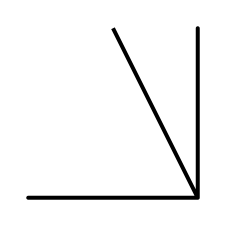

In [41]:
d = document(80, 80, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(4).join('round')
pts = []
for i in range(7):
    x = choice([-0.5, 0, 0.5])
    y = choice([-0.5, 0, 0.5])
    pts.append([x, y])
pline = Polyline(pts)
lines = figure.polyline(pline.scale(60).translate(40, 40))
page.place(lines)
show(page)

The key bit of code here is:

In [42]:
choice([-0.5, 0, 0.5])

-0.5

... which is a Python expression that returns one of `-0.5`, `0`, and `0.5` (at random). Using this expression for both the `x` and `y` coordinate of each point on the polyline leads to a result wherein each polyline randomly connects one of nine points on a grid. The `.scale()` and `.translate()` methods scale this polyline up and move it to the appropriate place on the screen (i.e., scaled up to 60 units, moved 40 units from the side to place it in the center of the screen).

The cell below defines a function, `grid_glyph()`, that generates a series of points using a more general version of this expression. It adds four to twelve segments to the polyline (randomly determined).

In [43]:
def grid_glyph():
    pts = []
    for i in range(int(t_normal(4, 12, 8, 2))):
        x = (choice([-0.5, 0, 0.5]))
        y = (choice([-0.5, 0, 0.5]))
        pts.append([x, y])
    return Polyline(pts)

The results of the `grid_glyph()` function:

In [44]:
grid_glyph()

Polyline([[0.5000, -0.5000], [0.0000, 0.5000], [-0.5000, -0.5000], [-0.5000, -0.5000], [0.0000, 0.0000], [0.5000, 0.0000], [0.0000, 0.5000], [0.5000, 0.5000], [0.5000, 0.0000]])

The following cell draws these glyphs on a grid, so we can see many variations at once:

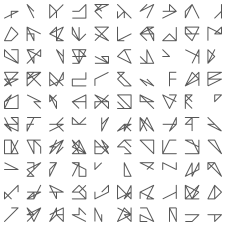

In [45]:
width = 80
height = 80
d = document(width, height, 'mm')
page = d.addpage()
brush = shape().nofill().stroke(rgba(40, 40, 40, 200)).width(1).join('round')
grid_size = 10
cell_size_x = width / grid_size
cell_size_y = height / grid_size
for i in range(grid_size):
    for j in range(grid_size):
        scale_val = (width / grid_size) * 0.6
        x = i * cell_size_x + (cell_size_x * 0.5)
        y = j * cell_size_y + (cell_size_y * 0.5)
        glyph = grid_glyph()
        glyph = glyph.scale(scale_val).translate(x, y)
        page.place(brush.polyline(glyph))
show(page)

Now we're getting somewhere. When your sci-fi author friend texts you and says "Hey, I need something that looks like a writing system for space aliens for the cover of my next book," you've got something all ready to go.

> Exercise: Can you make these polylines fall on a 4x4 grid instead of a 3x3 grid? Or a 5x5 grid?

> Exercise: Add some randomness to each point's placement, so not all points fall directly on the grid.

> Exercise: Change the aspect ratio of the "characters"—make them wider than they are tall, or taller than they are wide.

## Interpolating curves

Due to certain properties of human physiology, handwriting hardly ever consists of exactly straight lines. To simulate the curved lines of conventional handwriting, we need to find a way to change our polylines into *curves*. One way of doing this is a [Catmull-Rom spline](https://en.wikipedia.org/wiki/Centripetal_Catmull%E2%80%93Rom_spline), which produces a sequence of [Bézier curves](https://pomax.github.io/bezierinfo/) that pass through a given set of points. Bezmerizing `Polyline` objects have a function `smooth_path()` that uses Catmull-Rom to produce a path (i.e., a sequence of drawing instructions) that can draw such a curve given a set of points.

To demonstrate, we'll create a polyline from uniform points:

In [200]:
pline = uniform_glyph_baseline().scale(40).translate(20, 20)

And then call the `smooth_point_path()` method on the polyline:

In [201]:
curve_path = pline.smooth_path()

The object returned from `.smooth_path()` is a Bezmerizing `Path` object, that contains a series of Flat "path commands" to draw the curve:

In [202]:
curve_path

Path([moveto(x=36.0000, y=40.0000), curveto(x1=41.3167, y1=38.1349, x2=38.8689, y2=29.5024, x=35.9000, y=28.8096), moveto(x=35.9000, y=28.8096), curveto(x1=32.9311, y1=28.1167, x2=17.9706, y2=38.9584, x=18.1866, y=35.8428), moveto(x=18.1866, y=35.8428), curveto(x1=18.4026, y1=32.7271, x2=39.6453, y2=12.8629, x=37.1961, y=10.1156), moveto(x=37.1961, y=10.1156), curveto(x1=34.7470, y1=7.3682, x2=6.4365, y2=18.6452, x=3.4917, y=19.3588), moveto(x=3.4917, y=19.3588), curveto(x1=0.5468, y1=20.0723, x2=19.0886, y2=12.2328, x=19.5270, y=14.3971), moveto(x=19.5270, y=14.3971), curveto(x1=19.9654, y1=16.5614, x2=6.0073, y2=34.6666, x=6.1221, y=32.3446), moveto(x=6.1221, y=32.3446), curveto(x1=6.2368, y1=30.0225, x2=17.5179, y2=1.0734, x=20.2155, y=0.4648), moveto(x=20.2155, y=0.4648), curveto(x1=22.9130, y1=-0.1437, x2=20.2254, y2=22.7742, x=22.3073, y=28.6931), moveto(x=22.3073, y=28.6931), curveto(x1=24.3893, y1=34.6121, x2=31.5945, y2=40.3123, x=32.7073, y=35.9784)])

Like `Polyline` objects, `Path`s can be translated, rotated, scaled, etc.

For our purpose, the exact nature of Bézier curves and the Flat library's path commands are not consequential. Suffice it to say that you can pass the result of `.smooth_path()` to the `.path()` method of a flat `shape` object. The cell below draws both the points and the curve passing through those points:

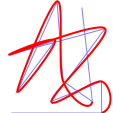

In [203]:
d = document(40, 40, 'mm')
page = d.addpage()
line_figure = shape().stroke(rgba(0, 0, 255, 128)).width(1)
curve_figure = shape().stroke(rgba(255, 0, 0, 255)).width(2)
page.place(line_figure.polyline(pline))
page.place(curve_figure.path(curve_path))
show(page)

### Catmull-Rom tightness

The `.smooth_path()` function takes a parameter `tightness` that controls the "tightness" of the spline. At `1` tightness, there is no curvature through the points at all; at `0`, the curvature is at its most curvy. You can use values outside this range—I like a tightness of `-0.5`. Above `1`, the curves start to form loops, which can be an interesting effect. Play with the `tightness` parameter in the example below to see how it works:

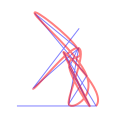

In [162]:
pline = uniform_glyph_baseline().scale(35).translate(20, 20)
d = document(40, 40, 'mm')
page = d.addpage()
line_figure = shape().stroke(rgba(0, 0, 255, 128)).width(1)
curve_figure = shape().stroke(rgba(255, 0, 0, 128)).width(2)
page.place(line_figure.polyline(pline))
curve_path = pline.smooth_path(tightness=-0.5)
page.place(curve_figure.path(curve_path))
show(page)

### Dealing with eaten points

You'll notice in the above example that the Catmull-Rom spline algorithm "eats" the first and last points of the polyline. (It uses those points to determine the position of the control points of the first and last curves of the spline.) Keep this in mind when you're using `.smooth_path()` and related functions—your procedure to generate glyphs needs to generate two extra points!

You can also get around this problem using the `Polyline` object's `augment()` method, which makes a copy of the Polyline that contains repeats of the first and last points of the polyline:

In [165]:
curve_path_aug = pline.augment().smooth_path()

Now when we draw the curve, you can see that the entire shape has been preserved:

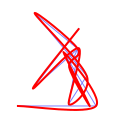

In [170]:
d = document(40, 40, 'mm')
page = d.addpage()
line_figure = shape().stroke(rgba(0, 0, 255, 128)).width(1)
curve_figure = shape().stroke(rgba(255, 0, 0, 255)).width(2)
page.place(line_figure.polyline(pline))
page.place(curve_figure.path(curve_path_aug))
show(page)

### Organic grid forms

The following example copies the grid of alien letterforms above, but uses `.augment()` and `.smooth_path()` to convert the points to curves before drawing. The results are much more "organic":

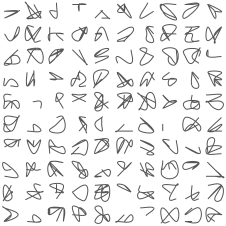

In [195]:
width = 80
height = 80
d = document(width, height, 'mm')
page = d.addpage()
brush = shape().nofill().stroke(rgba(40, 40, 40, 200)).width(1).join('round')
grid_size = 10
cell_size_x = width / grid_size
cell_size_y = height / grid_size
for i in range(grid_size):
    for j in range(grid_size):
        scale_val = (width / grid_size) * 0.6
        x = i * cell_size_x + (cell_size_x * 0.5)
        y = j * cell_size_y + (cell_size_y * 0.5)
        glyph = grid_glyph()
        glyph = glyph.scale(scale_val).translate(x, y)
        glyph_curve = glyph.augment().smooth_path(tightness=-0.5)
        # note .path() here, not .polyline()!
        page.place(brush.path(glyph_curve))
show(page)

## Scribbling in a line

Writing in certain alphabets proceeds in a linear direction across the page with connected letters; English cursive does this in particular. To simulate this, I wrote a function that generates a polyline with random points evenly spaced along a line horizontally, with the y-coordinate of each point set according to a random number selected from a normal distribution centered on zero.

In [172]:
def make_scribble(width, height, steps, stddev=0):
    pts = []
    for i in range(steps):
        x = ((width / steps) * i) + normal(0, stddev)
        y = normal(0, height)
        pts.append([x, y])
    return Polyline(pts)

Here's what it looks like. (The green line is the original polyline; the black line is the smoothed curve.)

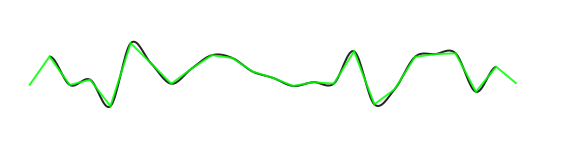

In [174]:
size = 200
d = document(200, 50, 'mm')
page = d.addpage()
line_figure = shape().stroke(rgba(0, 255, 0, 220)).width(2)
curve_figure = shape().stroke(rgba(0, 0, 0, 220)).width(2)
scribble_poly = make_scribble(width=180,
                    height=5,
                    steps=25,
                    stddev=0)
lines = line_figure.polyline(scribble_poly.translate(10, 25))
curve = curve_figure.path(scribble_poly.smooth_path().translate(10, 25))
page.place(curve) # comment to hide curves
page.place(lines) # comment to hide non-smooth lines
show(page)

The function also has a `stddev` parameter that allows you to adjust the standard deviation of a normally-distributed random number that adjusts the spacing of each point along the x-axis. This allows for the possibility of letters looping back on themselves:

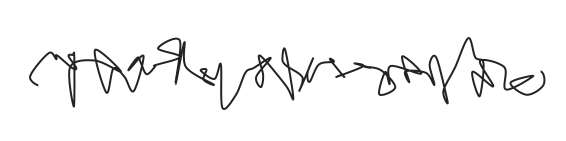

In [176]:
size = 200
d = document(200, 50, 'mm')
page = d.addpage()
line_figure = shape().stroke(rgba(0, 255, 0, 255)).width(1)
scribble_poly = make_scribble(width=180,
                    height=5,
                    steps=100,
                    stddev=3)
curve = curve_figure.path(scribble_poly.smooth_path().translate(10, 25))
page.place(curve)
show(page)

The following example displays multiple "lines" of these scribbles, moving down the page, using a `for` loop:

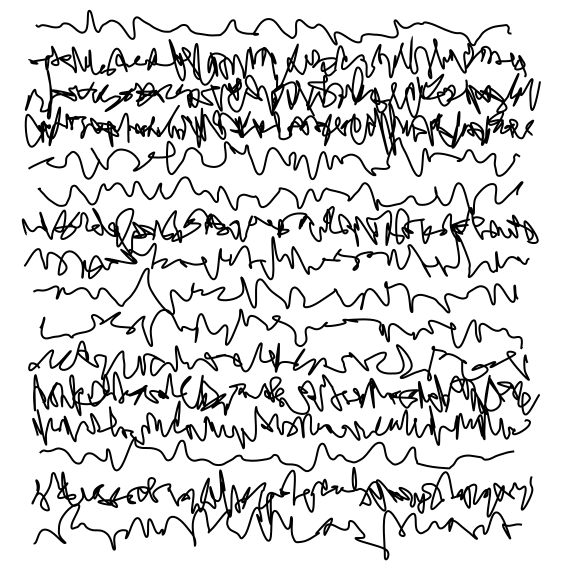

In [196]:
size = 200
d = document(size, size, 'mm')
page = d.addpage()
line_figure = shape().stroke(rgba(0, 255, 0, 255)).width(1)
curve_figure = shape().stroke(rgba(0, 0, 0, 255)).width(2)
row_n = 16
for i in range(row_n):
    scribble_poly = make_scribble(
                        width=size-20,
                        height=(size/row_n)*0.25,
                        steps=int(uniform(25, 250)),
                        stddev=uniform(2))
    scribble_poly_tr = scribble_poly.translate(
        10, 10 + (i*size/(row_n+1))) # row_n + 1 to leave some space at the bottom
    lines = line_figure.polyline(scribble_poly_tr)
    curve = curve_figure.path(scribble_poly_tr.smooth_path(tightness=-0.5))
    page.place(curve)
    #page.place(lines) # uncomment to see original lines
show(page)

> Exercise: Use the `i` parameter of the loop to control some other aspect of the line generation. (For example, make it so the number of steps increases as the scribbles move down the page.)

> Exercise: Introduce randomly-placed crosses (like the cross in `t`) and dots (as in `i`).

## Weighted strokes

The strokes produced by the flat library have a uniform width and texture, which makes the resulting artifacts resemble drawings made with a very precise pen. The problem of how to simulate how different writing implements make marks on a page ("brushes" in a tool like PhotoShop) is an open area of research in computer graphics research. ([A recent review](https://onlinelibrary.wiley.com/doi/full/10.1002/cav.1435).)

The Bezmerizing library comes with a handy function for doing this, which I'll demonstrate below. Let's start with a simple polyline shape:

In [210]:
pline = Polyline([[4, 4], [6, 34], [20, 20], [34, 34], [36, 4]])

We'll create a smooth path through this polyline as well:

In [212]:
curve_path = pline.augment().smooth_path()

Here's what the shape looks like, along with the Catmull-Rom spline through it:

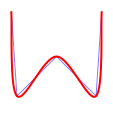

In [215]:
d = document(40, 40, 'mm')
page = d.addpage()
line_figure = shape().stroke(rgba(0, 0, 255, 128)).width(1)
curve_figure = shape().stroke(rgba(255, 0, 0, 255)).width(2)
page.place(line_figure.polyline(pline))
page.place(curve_figure.path(curve_path))
show(page)

The Bezmerizing library implements a simple technique for simulating an ink brush or other kinds of pens, which works by drawing a polygon along the tangents of the curves composing the stroke. The `Polyline` object has a `.fancy_curve()` method that performs the technique. The `samples_per` parameter controls the resolution of the polygon (lower values are faster to calculate but chunkier) and the `thicknesses` parameter controls the thickness of the polygon along the path.

In [250]:
curve_poly = pline.augment().fancy_curve(samples_per=24, thicknesses=[0, 1, 4, 1, 2, 1])

Here's an example that draws the original polyline, the Catmull-Rom curve created from the polyline, and the simulated brushstroke, just to show you how it works:

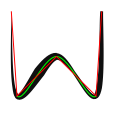

In [251]:
d = document(40, 40, 'mm')
page = d.addpage()
curve_figure = shape().nostroke().fill(rgba(0, 0, 0, 240))
smooth_figure = shape().stroke(rgba(0, 255, 0, 255))
poly_figure = shape().stroke(rgba(255, 0, 0, 255))
smooth_path = pline.smooth_path()
fancy_poly = curve_figure.polygon(curve_poly)
path = smooth_figure.path(smooth_path)
poly = poly_figure.polyline(pline)
page.place(fancy_poly)
page.place(path)
page.place(poly)
show(page)

Here's the "organic grid forms" example above, except using `fancy_curve()` to generate polygons for each stroke. (Try playing around with the `thickness` parameter.)

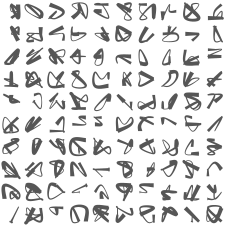

In [258]:
width = 80
height = 80
d = document(width, height, 'mm')
page = d.addpage()
brush = shape().fill(rgba(40, 40, 40, 200)).nostroke()
grid_size = 10
cell_size_x = width / grid_size
cell_size_y = height / grid_size
for i in range(grid_size):
    for j in range(grid_size):
        scale_val = (width / grid_size) * 0.6
        x = i * cell_size_x + (cell_size_x * 0.5)
        y = j * cell_size_y + (cell_size_y * 0.5)
        glyph = grid_glyph()
        glyph = glyph.scale(scale_val).translate(x, y)
        glyph_curve = glyph.augment().fancy_curve(samples_per=12,
                                                  thicknesses=[1.5, 0.5, 0.25, 1],
                                                  tightness=-0.25)
        page.place(brush.polygon(glyph_curve))
show(page)

## Connecting polylines

`Polyline` objects can be added together, creating a new polyline that combines their points:

In [259]:
a = Polyline([[10, 10], [20, 20]])
b = Polyline([[25, 35], [20, 25]])
a + b

Polyline([[10.0000, 10.0000], [20.0000, 20.0000], [25.0000, 35.0000], [20.0000, 25.0000]])

We can use this feature to combine two glyphs from the `make_char()` function, translating the second glyph to be to the right of the first glyph.

In [267]:
composite = grid_glyph() + grid_glyph().translate(1.5, 0)
composite = composite.scale(30).translate(30, 30) # scale it up so we can actually see it!

Here's what it looks like (original polyline in light purple, curve in cyan):

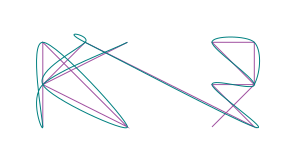

In [268]:
d = document(100, 50, 'mm')
page = d.addpage()
line_fig = shape().stroke(rgba(160, 80, 160, 255)).nofill()
curve_fig = shape().stroke(rgba(0, 128, 128, 255)).nofill()
page.place(line_fig.polyline(composite))
page.place(curve_fig.path(composite.smooth_path()))
show(page)

To make a whole row of these, just keep appending glyphs with increasing translation along the X axis:

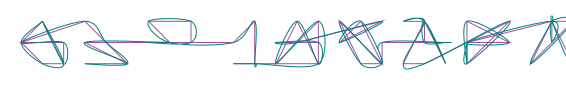

In [275]:
line = grid_glyph()
for i in range(1, 10):
    line += grid_glyph().translate(i*1.5, 0)
line = line.scale(15).translate(15, 15)
d = document(200, 30, 'mm')
page = d.addpage()
line_fig = shape().stroke(rgba(160, 80, 160, 255)).nofill()
curve_fig = shape().stroke(rgba(0, 128, 128, 255)).nofill()
page.place(line_fig.polyline(line))
page.place(curve_fig.path(line.smooth_path()))
show(page)

The following example takes advantage of this technique in order to produce a composition of several lines. As a change of pace, let's work with a limited set of glyphs, instead of generating a new glyph every time we want to place one on the page:

In [276]:
chars = [grid_glyph() for i in range(26)]

Working with a limited set of glyphs (in my experience) provides a bit of verisimilitude, since you expect to see repeated figures in handwriting. But you also have to be careful to add a bit of variation to the glyphs, because otherwise it can look a bit "robotic." (Though "robotic" might be exactly what you're going for. I don't know.)

The code below generates ten lines of these "cursive" (i.e., connected) forms:

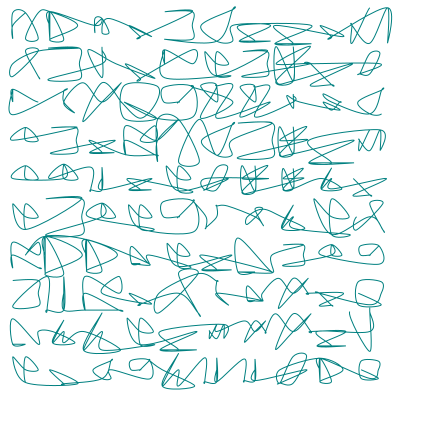

In [277]:
d = document(150, 150, 'mm')
page = d.addpage()
line_fig = shape().stroke(rgba(128, 0, 128, 255)).nofill()
curve_fig = shape().stroke(rgba(0, 128, 128, 255)).nofill()
for row in range(10):
    line = choice(chars)
    for col in range(1, 10):
        # scale(normal(...)) adds a bit of size variation to the glyphs
        line += choice(chars).scale(normal(1, 0.25)).translate(col*1.5, 0)
    # translate the row to the right place on the screen and make it bigger
    line = line.translate(1, 1+row*1.5).scale(9)
    smooth = line.smooth_path()
    #page.place(line_fig.polyline(line)) # uncomment to see original polylines
    page.place(curve_fig.path(smooth))
show(page)

One last riff for you to look through through...

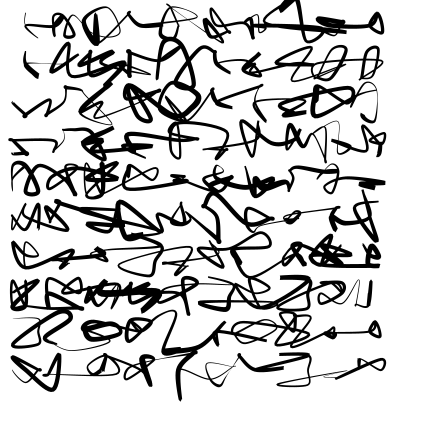

In [287]:
d = document(150, 150, 'mm')
page = d.addpage()
stroke_fig = shape().nostroke().fill(rgba(0, 0, 0, 255))
for row in range(10):
    line = choice(chars)
    for col in range(1, 10):
        # rotate, scale(normal(...)) add a bit of size variation to the glyphs
        line += choice(chars).rotate(normal(0, np.pi*0.25)).scale(normal(1, 0.25)).translate(col*1.5, 0)
    # translate the row to the right place on the screen and make it bigger
    line = line.translate(1, 1+row*1.5).scale(9)
    # set thicknesses to random values
    fancy = line.fancy_curve(thicknesses=[t_normal(0, 5, 1, 0.5) for i in range(40)],
                             samples_per=12)
    page.place(stroke_fig.polygon(fancy))
    #page.place(line_fig.polyline(line)) # uncomment to see original polylines
    #page.place(curve_fig.path(smooth))
show(page)